<a href="https://colab.research.google.com/github/zhibzemamunkueva/ML-NSU/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Dataset Wine

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X[-5:]

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


# Описание датасета

In [ ]:
print('Количество семплов: ', X.shape[0])
print('Количество признаков: ', X.shape[1])
print('Признаки: \n', X.columns)
print('Количество классов вин:', y['class'].unique())

Количество семплов:  178
Количество признаков:  13
Признаки: 
 Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')
Количество классов вин: [1 2 3]


In [ ]:
freq = y['class'].value_counts()
labels = ['class 1', 'class 2', 'class 3']
values = [freq.iloc[0], freq.iloc[1], freq.iloc[2]]
colors = ['green', 'red', 'blue']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Wines by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

# Типы данных в ячейках

In [ ]:
X.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object

# Распределение данных по признакам





In [ ]:
data = pd.concat([X, y], axis=1)

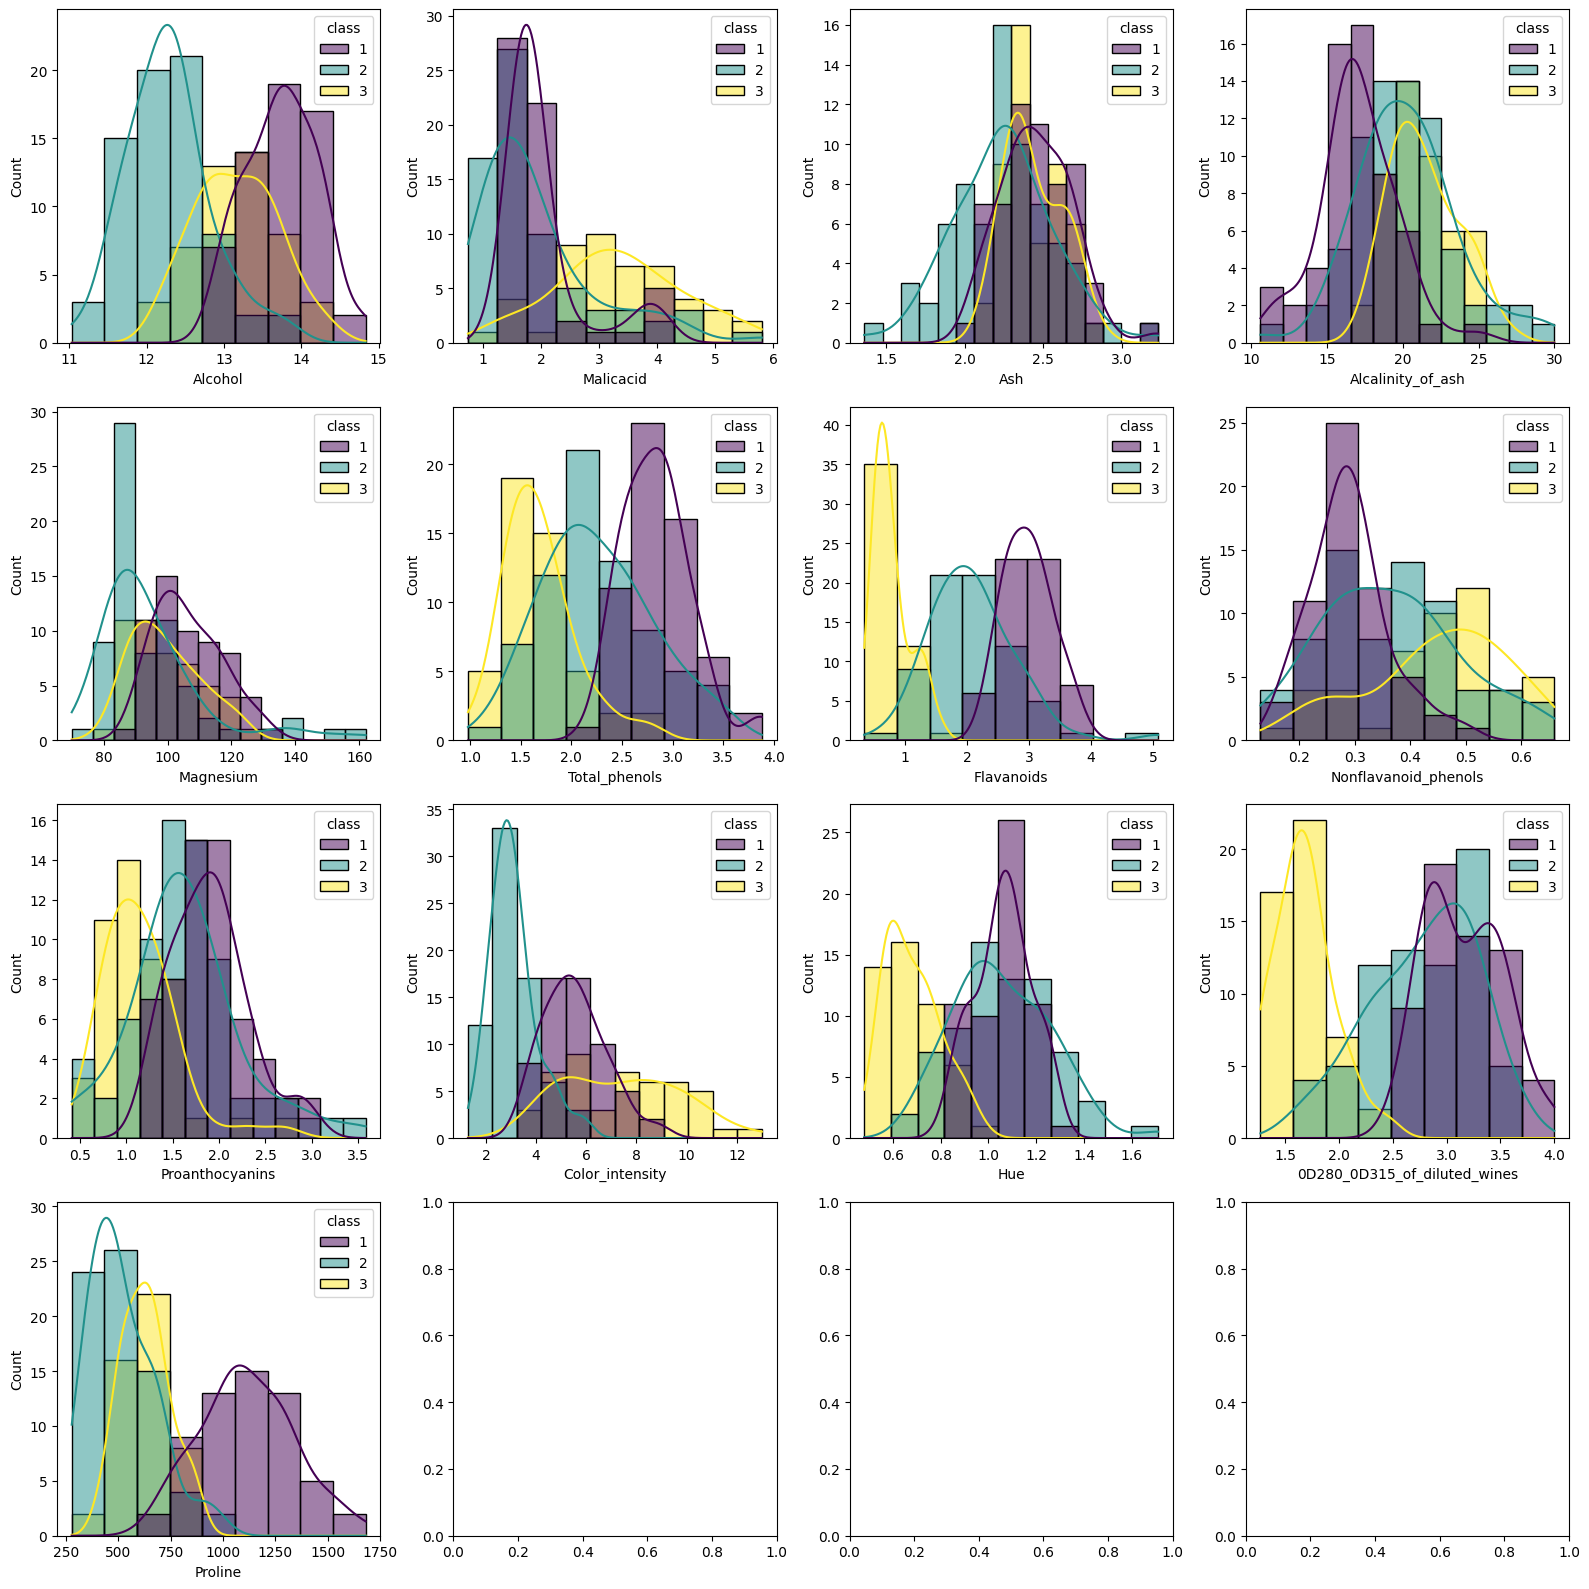

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i, ax in enumerate(axes.flatten()):
  if i < X.shape[1]:
    sns.histplot(data=data, x=X.columns[i], hue='class', kde=True, ax=ax, palette='viridis')
plt.tight_layout()

# Корреляция

Text(0.5, 1.0, 'correlation matrix')

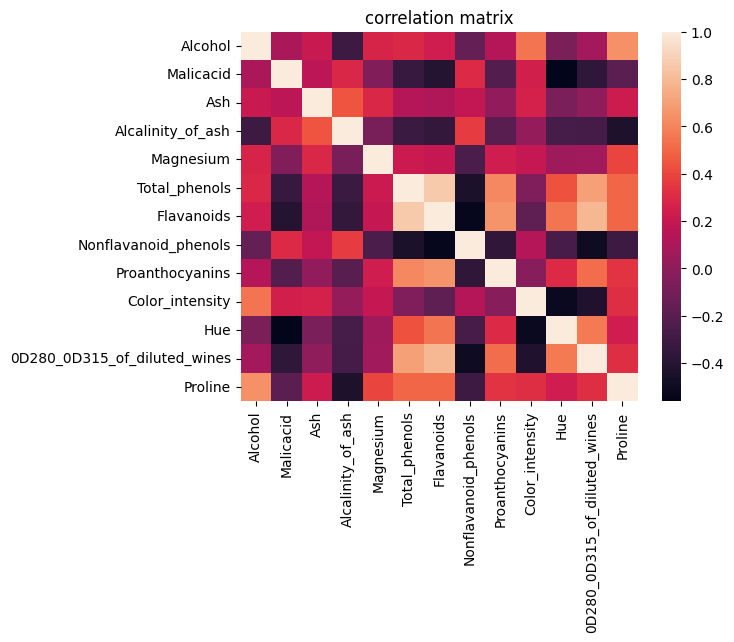

In [ ]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix)
plt.title('correlation matrix')

Ash                0D280_0D315_of_diluted_wines    0.003911
                   Proanthocyanins                 0.009652
Alcalinity_of_ash  Color_intensity                 0.018732
Proanthocyanins    Color_intensity                 0.025250
Malicacid          Magnesium                       0.054575
                                                     ...   
Flavanoids         Proanthocyanins                 0.652692
Total_phenols      0D280_0D315_of_diluted_wines    0.699949
Flavanoids         0D280_0D315_of_diluted_wines    0.787194
Total_phenols      Flavanoids                      0.864564
Alcohol            Alcohol                         1.000000
Length: 79, dtype: float64


Text(1, 0.715, '2 не коррелирующих признака: \nAsh& 0D280_0D315_of_diluted_wines\n\n2 самых коррелирующих признака: \nTotal_phenols& Flavanoids')

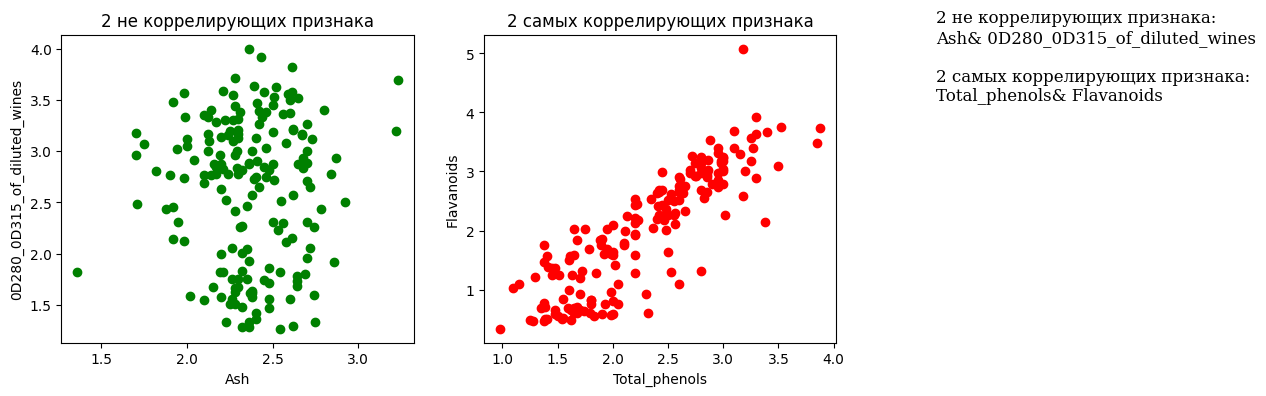

In [ ]:
sorted_corr = corr_matrix.abs().unstack().drop_duplicates().sort_values()
print(sorted_corr)
not_corr_pair, corr_pair = sorted_corr.index[0], sorted_corr.index[-2]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(X[not_corr_pair[0]], X[not_corr_pair[1]], color='g')
ax[0].set_title('2 не коррелирующих признака')
ax[0].set_xlabel(not_corr_pair[0])
ax[0].set_ylabel(not_corr_pair[1])

ax[1].scatter(X[corr_pair[0]], X[corr_pair[1]], color='r')
ax[1].set_title('2 самых коррелирующих признака')
ax[1].set_xlabel(corr_pair[0])
ax[1].set_ylabel(corr_pair[1])

fig.text(1, 0.715,
'''2 не коррелирующих признака: \n'''+ str(not_corr_pair[0])+'''& '''+str(not_corr_pair[1])+'''
\n2 самых коррелирующих признака: \n'''+str(corr_pair[0])+'''& '''+str(corr_pair[1])
         , fontsize=12, fontweight='light', fontfamily='serif')

# Обучение decision tree с помощью gini

In [ ]:
def DecisionTree(X_train, X_test, y_train, y_test, depth=4):
  model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  fig, ax = plt.subplots(1, 2, figsize=(15, 6))
  tree.plot_tree(model, ax=ax[0])
  ax[0].set_title('Decision Tree')

  conf_mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax[1])
  ax[1].set_title('Confusion Matrix')
  ax[1].set_xlabel('Predicted Class')
  ax[1].set_ylabel('Real Class')
  return [model, y_pred]

In [ ]:
def Metrics(y_test, y_pred):
  f1 = f1_score(y_test, y_pred, average='macro')
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')
  recall = recall_score(y_test, y_pred, average='macro')
  print('Метрики:\nf1 score:', f1, '\naccuracy:', accuracy,'\nprecision:', precision, '\nrecall', recall)

Не коррелирующие признаки

Метрики:
f1 score: 0.6752047090363377 
accuracy: 0.6666666666666666 
precision: 0.6999999999999998 
recall 0.7311507936507936


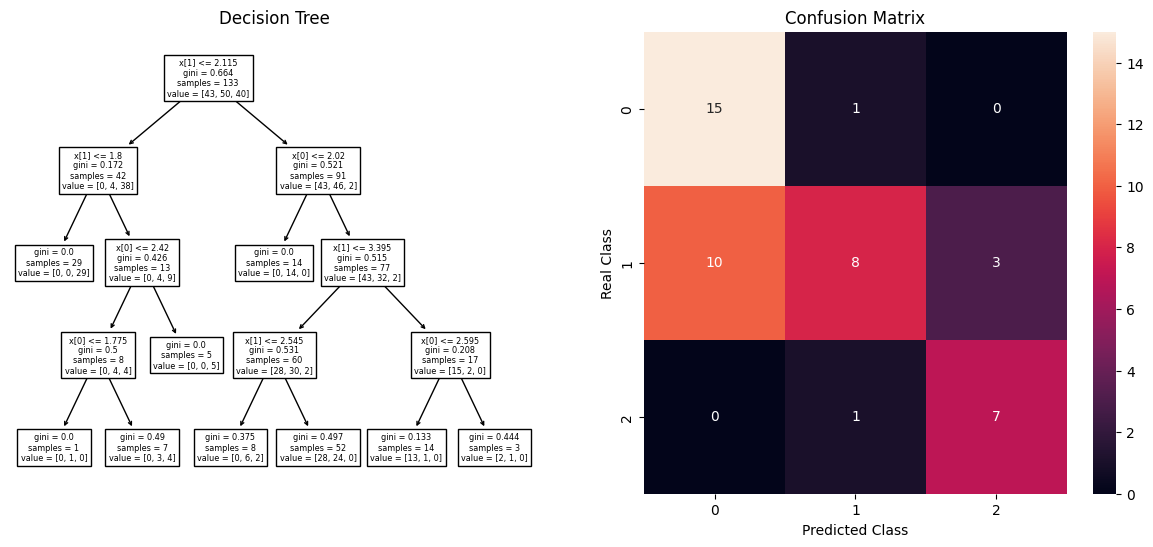

In [ ]:
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X[[not_corr_pair[0], not_corr_pair[1]]], y, random_state=0)
model_nc, y_pred_nc = DecisionTree(X_train_nc, X_test_nc, y_train_nc, y_test_nc, 4)
Metrics(y_test_nc, y_pred_nc)

Коррелирующие признаки

Метрики:
f1 score: 0.6815656565656566 
accuracy: 0.6444444444444445 
precision: 0.6850414078674948 
recall 0.6805555555555555


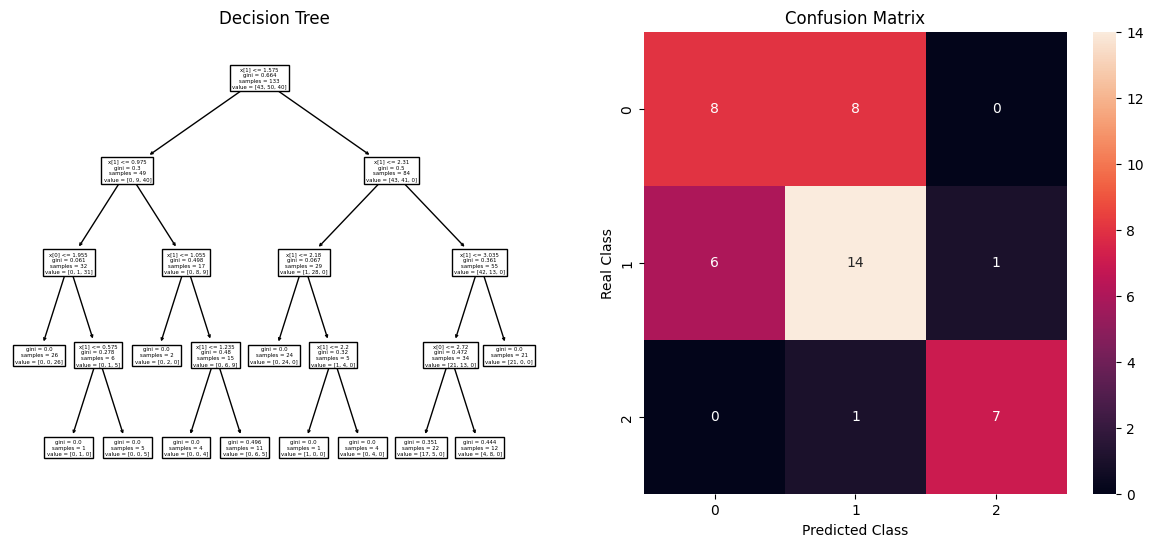

In [ ]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X[[corr_pair[0], corr_pair[1]]], y, random_state=0)
model_c, y_pred_c = DecisionTree(X_train_c, X_test_c, y_train_c, y_test_c, 4)
Metrics(y_test_c, y_pred_c)

# Random Forest

**Важность признаков**

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y['class'], random_state=0)
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = model_rf.predict(X_test_rf)

Metrics(y_test_rf, y_pred_rf)

Метрики:
f1 score: 0.9722620755619321 
accuracy: 0.9777777777777777 
precision: 0.9629629629629629 
recall 0.9841269841269842


Text(0.5, 1.0, 'Feature Importance')

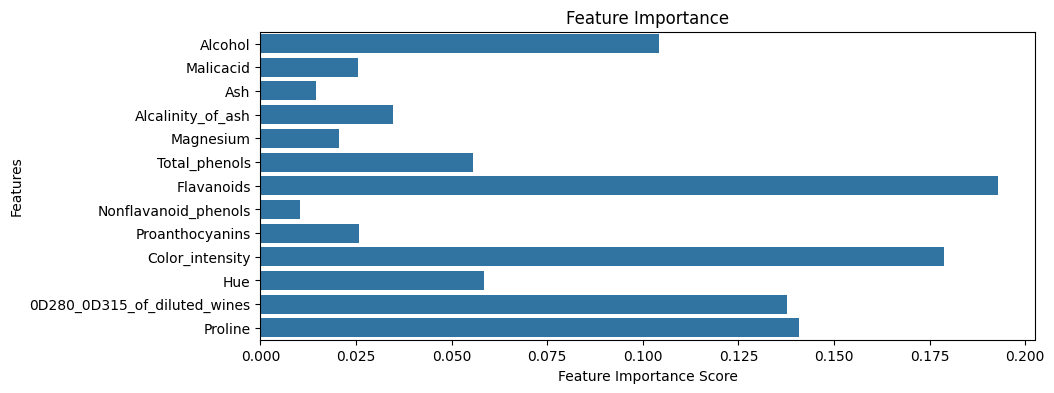

In [ ]:
feature_importance = pd.Series(model_rf.feature_importances_, index=data.columns[:-1])
plt.figure(figsize=(10, 4))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')

# Roc Curve

In [ ]:
def RocCurve(model, X_test, y_test):
  y_proba = model.predict_proba(X_test)
  y_bin = label_binarize(y_test, classes=[1, 2, 3])
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(len(np.unique(y_test))):
      fpr[i], tpr[i], thresholds = roc_curve(y_bin[:, i], y_proba[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  return [fpr, tpr, roc_auc]

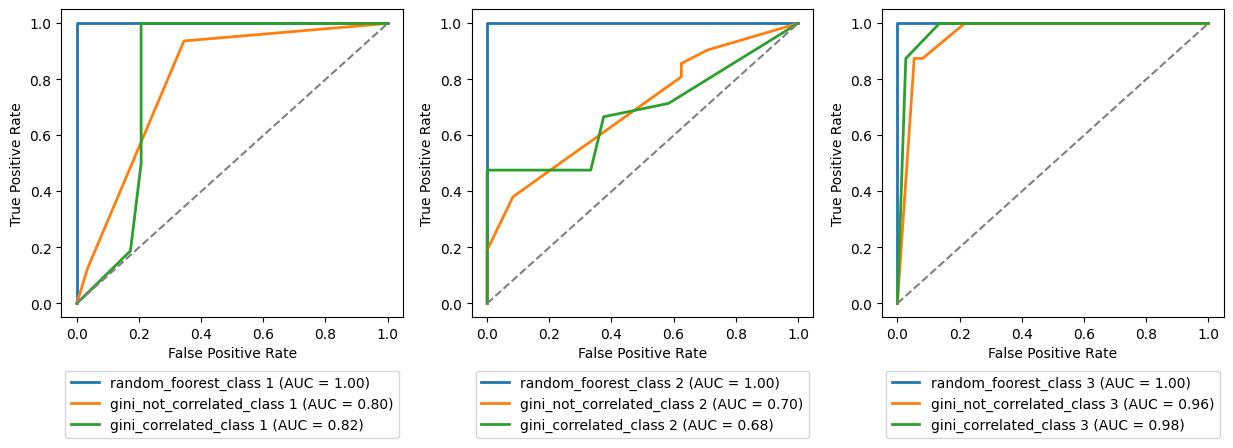

In [ ]:
fpr_rf, tpr_rf, roc_auc_rf = RocCurve(model_rf, X_test_rf, y_test_rf)
fpr_nc, tpr_nc, roc_auc_nc = RocCurve(model_nc, X_test_nc, y_test_nc)
fpr_c, tpr_c, roc_auc_c = RocCurve(model_c, X_test_c, y_test_c)
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i in range(len(np.unique(y_test_rf))):
    ax[i].plot(fpr_rf[i], tpr_rf[i], lw=2, label='random_foorest_class {0} (AUC = {1:.2f})'.format(i+1, roc_auc_rf[i]))
    ax[i].plot(fpr_nc[i], tpr_nc[i], lw=2, label='gini_not_correlated_class {0} (AUC = {1:.2f})'.format(i+1, roc_auc_nc[i]))
    ax[i].plot(fpr_c[i], tpr_c[i], lw=2, label='gini_correlated_class {0} (AUC = {1:.2f})'.format(i+1, roc_auc_c[i]))
    ax[i].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[i].set_xlabel('False Positive Rate')
    ax[i].set_ylabel('True Positive Rate')
    ax[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15))